In [1]:
from helper import*
import params as cfg
import sys
sys.path.insert(1, '/Users/joshuaighalo/Documents/GitHub/eegDementia')

## Functions Utilized

In [2]:
"Functions utilized in this script"
def multipleFilesNotch(input_3d,fs):
    notch_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        notch_out.append(filtering.notch(input_3d[i,:,:],fs))
    return np.array(notch_out)
def multipleFilesbutterBandpass(input_3d,lowcut,highcut,fs):
    butter_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        butter_out.append(filtering.butterBandPass(input_3d[i,:,:],lowcut,highcut,fs))
    return np.array(butter_out)
def multipleArtfRemoval(input_3d,threshold_value,timearray,len_window,step_size,choice_numwindows,channels,group):
    print(group)
    artf_out = []
    for i in range(input_3d.shape[0]):
        artf_out.append(ar_maximumgradient(input_3d[i,:,:],threshold_value,timearray,len_window,step_size,choice_numwindows,channels))
    print('***************************************************************************************************************************************************************')
    return np.array(artf_out)
def multiplePSD(data_4D,fs):
    freqs,psd = [],[]
    for i in range(data_4D.shape[0]):
        freqs.append(computePSD(data_4D[i],fs,data_type='3D')[0])
        psd.append(computePSD(data_4D[i],fs,data_type='3D')[1])
    psd = np.array(psd)
    freqs = np.array(freqs)
    return freqs,psd
def multipleRelativeBandPower(input_3d,freq_array,low,high):
    avg_out = []
    for i in range(input_3d.shape[0]):
        avg_out.append(psdRelativeBandPower(input_3d[i,:,:],freq_array,low,high))
    return np.array(avg_out)
def spectrogram4D(data,title,fs,figsize,subtitles):
    eeg,sr = data,fs
    WinLength,step = int(sr/2),int(sr/4)
    myparams = dict(nperseg = WinLength, noverlap = WinLength-step, return_onesided=True, mode='magnitude')
    f_1, nseg_1, Sxx_1 = signal.spectrogram(x = eeg[:,0], fs=sr, **myparams)
    f_2, nseg_2, Sxx_2 = signal.spectrogram(x = eeg[:,1], fs=sr, **myparams)
    f_3, nseg_3, Sxx_3 = signal.spectrogram(x = eeg[:,2], fs=sr, **myparams)
    f_4, nseg_4, Sxx_4 = signal.spectrogram(x = eeg[:,3], fs=sr, **myparams)
    fig, ax = plt.subplots(1,4, figsize=(figsize[0],figsize[1]), constrained_layout=True)
    fig.suptitle(title)
    ax[0].set_title(subtitles[0])
    ax[1].set_title(subtitles[1])
    ax[2].set_title(subtitles[2])
    ax[3].set_title(subtitles[3])
    ax[0].set(xlabel='Time (ms)',ylabel='Frequency (Hz)')
    ax[1].set(xlabel='Time (ms)',ylabel='Frequency (Hz)')
    ax[2].set(xlabel='Time (ms)',ylabel='Frequency (Hz)')
    ax[3].set(xlabel='Time (ms)',ylabel='Frequency (Hz)')
    #nseg_1,nseg_2,nseg_3,nseg_4 = np.linspace(0,500,4),np.linspace(0,500,4),np.linspace(0,500,4),np.linspace(0,500,4)
    nseg_1,nseg_2,nseg_3,nseg_4 = np.linspace(0,500,len(Sxx_1.T)),np.linspace(0,500,len(Sxx_2.T)),np.linspace(0,500,len(Sxx_3.T)),np.linspace(0,500,len(Sxx_4.T))
    X1,X2,X3,X4 = nseg_1,nseg_2,nseg_3,nseg_4
    Y1,Y2,Y3,Y4 = f_1,f_2,f_3,f_4
    Z1,Z2,Z3,Z4 = Sxx_1,Sxx_2,Sxx_3,Sxx_4
    levels = 45
    spectrum = ax[0].contourf(X1,Y1,Z1,levels, cmap='jet')#,'linecolor','none')
    spectrum = ax[1].contourf(X2,Y2,Z2,levels, cmap='jet')#,'linecolor','none')
    spectrum = ax[2].contourf(X3,Y3,Z3,levels, cmap='jet')#,'linecolor','none')
    spectrum = ax[3].contourf(X4,Y4,Z4,levels, cmap='jet')#,'linecolor','none')
    cbar = plt.colorbar(spectrum)#, boundaries=np.linspace(0,1,5))
    #cbar.ax.set_ylabel('Amplitude (dB)', rotation=90)
    plt.show()
    return X1,X2,X3,X4,Y1,Y2,Y3,Y4,Z1,Z2,Z3,Z4
def spectrogram1D(data,title,fs,figsize,subtitles):
    eeg,sr = data,fs
    WinLength,step = int(sr/2),int(sr/4)
    myparams = dict(nperseg = WinLength, noverlap = WinLength-step, return_onesided=True, mode='magnitude')
    f_1, nseg_1, Sxx_1 = signal.spectrogram(x = eeg, fs=sr, **myparams)
    fig, ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
    fig.suptitle(title)
    ax.set_title(subtitles)
    ax.set(xlabel='Time (ms)',ylabel='Frequency (Hz)')
    nseg_1 = np.linspace(0,500,4)
    X1,Y1,Z1,levels = nseg_1,f_1,Sxx_1,45
    spectrum = ax.contourf(X1,Y1,Z1,levels, cmap='jet')#,'linecolor','none')
    cbar = plt.colorbar(spectrum)#, boundaries=np.linspace(0,1,5))
    #cbar.ax.set_ylabel('Amplitude (dB)', rotation=90)
    plt.show()

## Import Raw Dataset

In [3]:
"""
#   Group-Task-Time
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
M21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
M22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
C21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
C22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/v2/"
destDir = "/Users/joshuaighalo/Downloads/v2/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'
"""


'\n#   Group-Task-Time\nM11 = [\'m11_1.zip\',\'m11_2.zip\',\'m11_3.zip\',\'m11_4.zip\',\'m11_5.zip\']\nM21 = [\'m21_1.zip\',\'m21_2.zip\',\'m21_3.zip\',\'m21_4.zip\',\'m21_5.zip\']\nM12 = [\'m12_1.zip\',\'m12_2.zip\',\'m12_3.zip\',\'m12_4.zip\',\'m12_5.zip\']\nM22 = [\'m22_1.zip\',\'m22_2.zip\',\'m22_3.zip\',\'m22_4.zip\',\'m22_5.zip\']\nC11 = [\'c11_1.zip\',\'c11_2.zip\',\'c11_3.zip\',\'c11_4.zip\',\'c11_5.zip\']\nC21 = [\'c21_1.zip\',\'c21_2.zip\',\'c21_3.zip\',\'c21_4.zip\',\'c21_5.zip\']\nC12 = [\'c12_1.zip\',\'c12_2.zip\',\'c12_3.zip\',\'c12_4.zip\',\'c12_5.zip\']\nC22 = [\'c22_1.zip\',\'c22_2.zip\',\'c22_3.zip\',\'c22_4.zip\',\'c22_5.zip\']\nlocalDir = "/Users/joshuaighalo/Downloads/v2/"\ndestDir = "/Users/joshuaighalo/Downloads/v2/dest/"\nos.system(\'rm -rf %s/*\' % destDir)\nfs_setting = \'constant\'\n'

In [4]:
""" showed ryan
C11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
C21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
C12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
C22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
M11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
M21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
M12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
M22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/v2/"
destDir = "/Users/joshuaighalo/Downloads/v2/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'
"""


' showed ryan\nC11 = [\'m11_1.zip\',\'m11_2.zip\',\'m11_3.zip\',\'m11_4.zip\',\'m11_5.zip\']\nC21 = [\'m21_1.zip\',\'m21_2.zip\',\'m21_3.zip\',\'m21_4.zip\',\'m21_5.zip\']\nC12 = [\'m12_1.zip\',\'m12_2.zip\',\'m12_3.zip\',\'m12_4.zip\',\'m12_5.zip\']\nC22 = [\'m22_1.zip\',\'m22_2.zip\',\'m22_3.zip\',\'m22_4.zip\',\'m22_5.zip\']\nM11 = [\'c11_1.zip\',\'c11_2.zip\',\'c11_3.zip\',\'c11_4.zip\',\'c11_5.zip\']\nM21 = [\'c21_1.zip\',\'c21_2.zip\',\'c21_3.zip\',\'c21_4.zip\',\'c21_5.zip\']\nM12 = [\'c12_1.zip\',\'c12_2.zip\',\'c12_3.zip\',\'c12_4.zip\',\'c12_5.zip\']\nM22 = [\'c22_1.zip\',\'c22_2.zip\',\'c22_3.zip\',\'c22_4.zip\',\'c22_5.zip\']\nlocalDir = "/Users/joshuaighalo/Downloads/v2/"\ndestDir = "/Users/joshuaighalo/Downloads/v2/dest/"\nos.system(\'rm -rf %s/*\' % destDir)\nfs_setting = \'constant\'\n'

In [5]:
"""
#   Group-Task-Time # TEST
M12 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
C21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M11 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
C22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
M22 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
M21 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/v2/"
destDir = "/Users/joshuaighalo/Downloads/v2/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'
"""

'\n#   Group-Task-Time # TEST\nM12 = [\'m11_1.zip\',\'m11_2.zip\',\'m11_3.zip\',\'m11_4.zip\',\'m11_5.zip\']\nC21 = [\'m21_1.zip\',\'m21_2.zip\',\'m21_3.zip\',\'m21_4.zip\',\'m21_5.zip\']\nM11 = [\'m12_1.zip\',\'m12_2.zip\',\'m12_3.zip\',\'m12_4.zip\',\'m12_5.zip\']\nC22 = [\'m22_1.zip\',\'m22_2.zip\',\'m22_3.zip\',\'m22_4.zip\',\'m22_5.zip\']\nC11 = [\'c11_1.zip\',\'c11_2.zip\',\'c11_3.zip\',\'c11_4.zip\',\'c11_5.zip\']\nM22 = [\'c21_1.zip\',\'c21_2.zip\',\'c21_3.zip\',\'c21_4.zip\',\'c21_5.zip\']\nC12 = [\'c12_1.zip\',\'c12_2.zip\',\'c12_3.zip\',\'c12_4.zip\',\'c12_5.zip\']\nM21 = [\'c22_1.zip\',\'c22_2.zip\',\'c22_3.zip\',\'c22_4.zip\',\'c22_5.zip\']\nlocalDir = "/Users/joshuaighalo/Downloads/v2/"\ndestDir = "/Users/joshuaighalo/Downloads/v2/dest/"\nos.system(\'rm -rf %s/*\' % destDir)\nfs_setting = \'constant\'\n'

In [6]:
#"""
#   Group-Task-Time Ryan SEEN
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
C21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
C22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
M21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
M22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/v2/"
destDir = "/Users/joshuaighalo/Downloads/v2/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'
#"""


## Convert Data from Raw (zip format) to numpy data

In [7]:
#   Extract eeg data from participants within the groups
M11 = zipExtract(M11,localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21 = zipExtract(M21,localDir,destDir,"M21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12 = zipExtract(M12,localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22 = zipExtract(M22,localDir,destDir,"M22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C11 = zipExtract(C11,localDir,destDir,"C11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21 = zipExtract(C21,localDir,destDir,"C21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12 = zipExtract(C12,localDir,destDir,"C12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22 = zipExtract(C22,localDir,destDir,"C22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
time_s = np.arange(0,cfg.collection_time,1/cfg.fs)

## Notch Filter Data

In [8]:
#   Notch filters data collected from participants
noc_M11 = multipleFilesNotch(M11,cfg.fs)
noc_M21 = multipleFilesNotch(M21,cfg.fs)
noc_M12 = multipleFilesNotch(M12,cfg.fs)
noc_M22 = multipleFilesNotch(M22,cfg.fs)
noc_C11 = multipleFilesNotch(C11,cfg.fs)
noc_C21 = multipleFilesNotch(C21,cfg.fs)
noc_C12 = multipleFilesNotch(C12,cfg.fs)
noc_C22 = multipleFilesNotch(C22,cfg.fs)

## Band Pass Dataset

In [9]:
#   Bandpass filters data collected from participants
band_M11 = multipleFilesbutterBandpass(noc_M11,cfg.lowcut,cfg.highcut,cfg.fs)
band_M21 = multipleFilesbutterBandpass(noc_M21,cfg.lowcut,cfg.highcut,cfg.fs)
band_M12 = multipleFilesbutterBandpass(noc_M12,cfg.lowcut,cfg.highcut,cfg.fs)
band_M22 = multipleFilesbutterBandpass(noc_M22,cfg.lowcut,cfg.highcut,cfg.fs)
band_C11 = multipleFilesbutterBandpass(noc_C11,cfg.lowcut,cfg.highcut,cfg.fs)
band_C21 = multipleFilesbutterBandpass(noc_C21,cfg.lowcut,cfg.highcut,cfg.fs)
band_C12 = multipleFilesbutterBandpass(noc_C12,cfg.lowcut,cfg.highcut,cfg.fs)
band_C22 = multipleFilesbutterBandpass(noc_C22,cfg.lowcut,cfg.highcut,cfg.fs)

## Visualization: Bar Plots

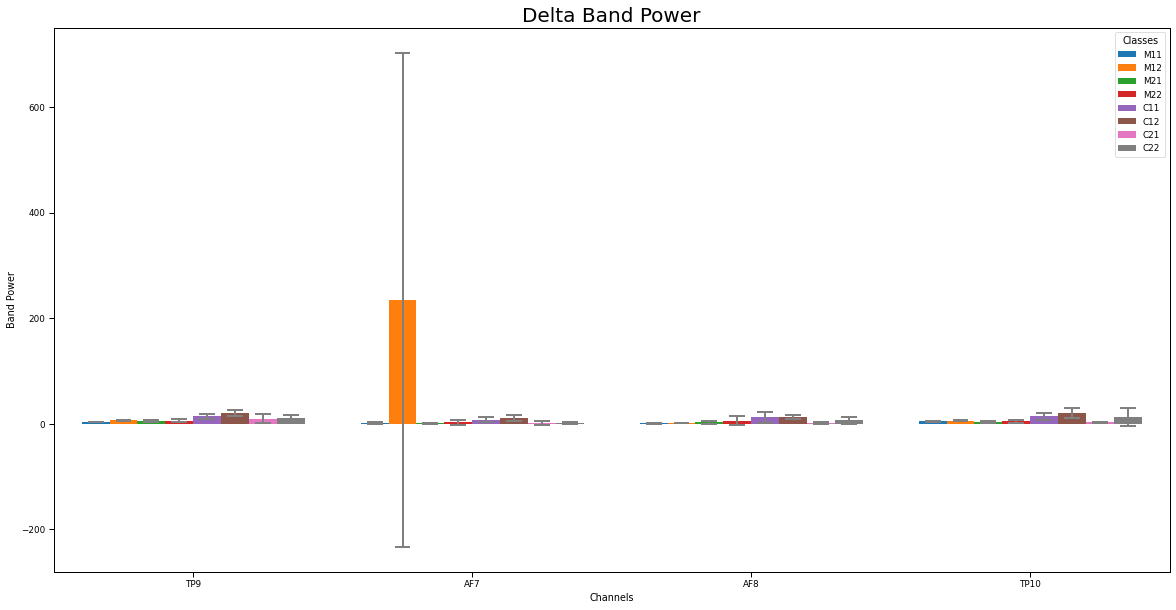

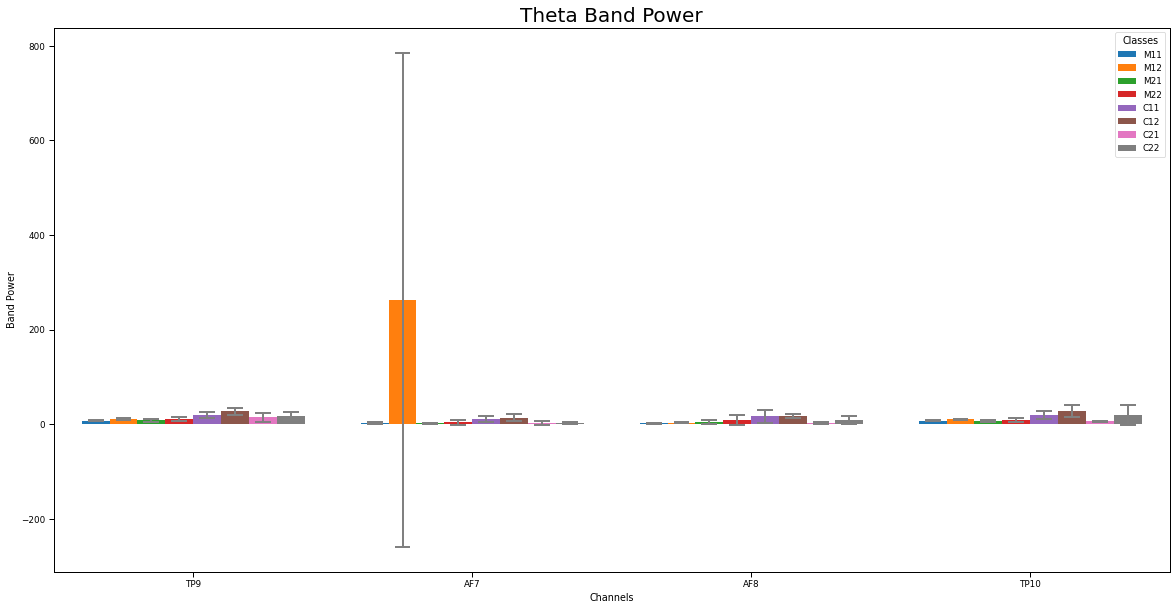

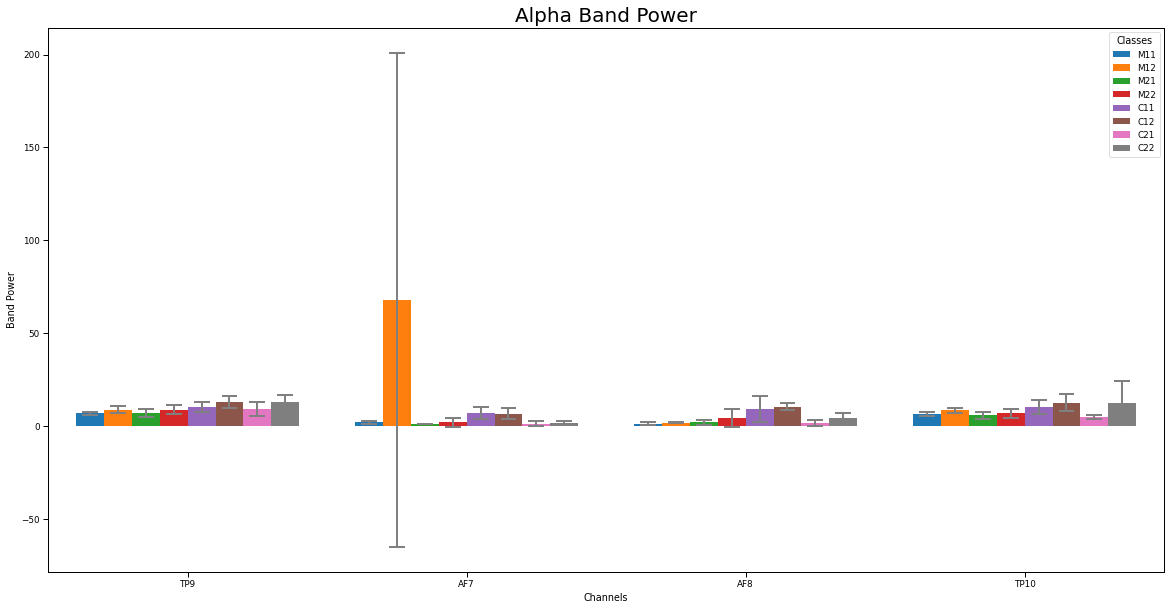

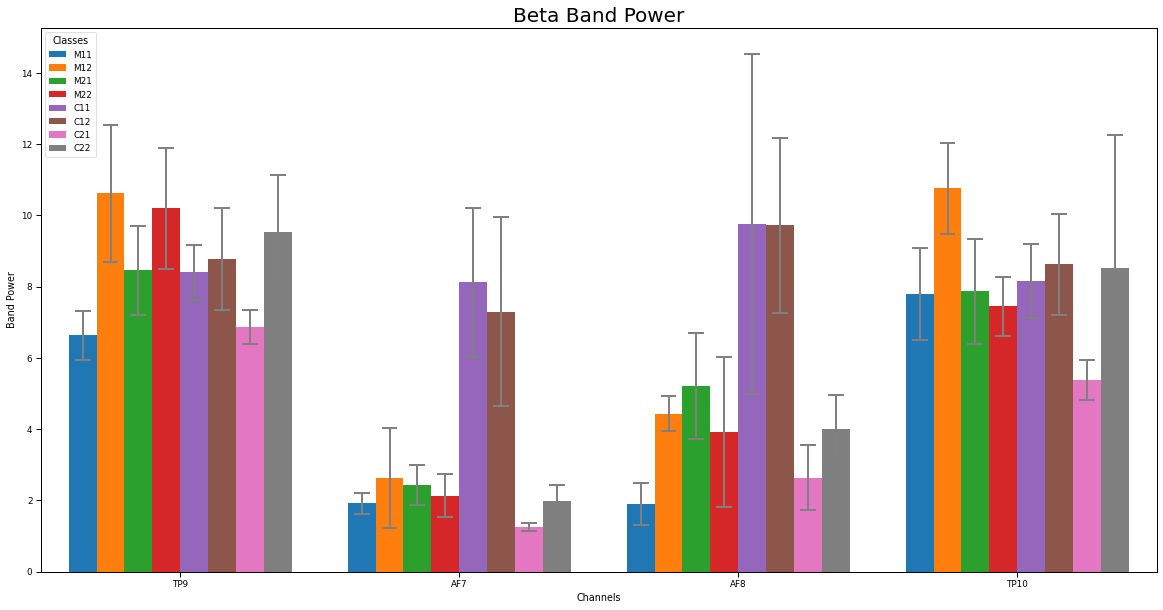

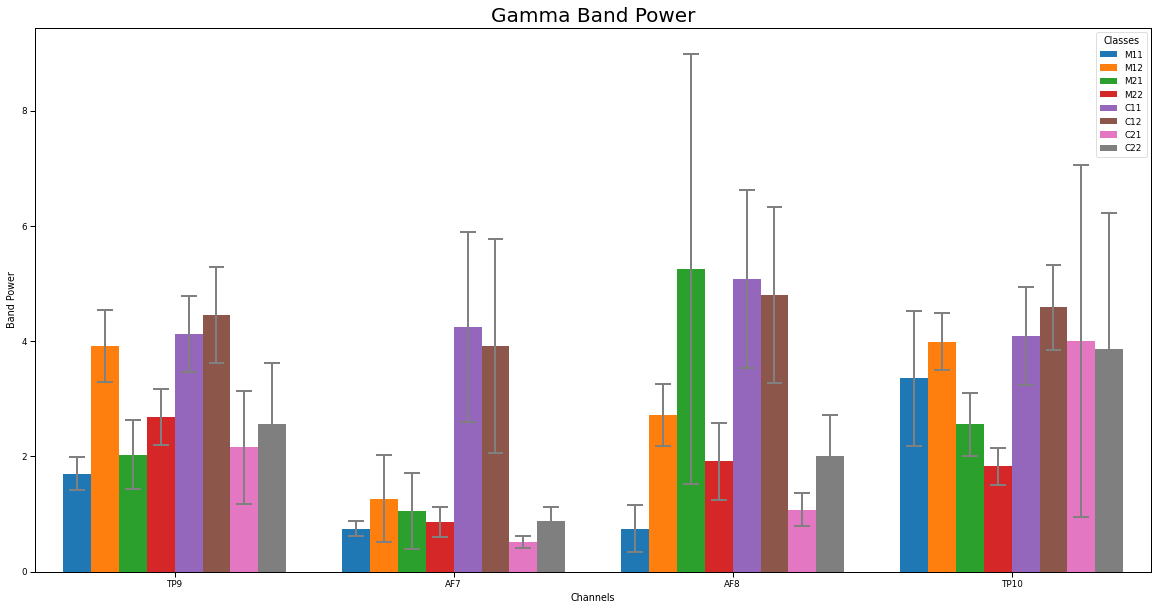

In [20]:
tp9 = np.hstack((deltaM11[:,0],deltaM21[:,0],deltaM12[:,0],deltaM22[:,0],deltaC11[:,0],deltaC21[:,0],deltaC12[:,0],deltaC22[:,0],
                 thetaM11[:,0],thetaM21[:,0],thetaM12[:,0],thetaM22[:,0],thetaC11[:,0],thetaC21[:,0],thetaC12[:,0],thetaC22[:,0],
                 alphaM11[:,0],alphaM21[:,0],alphaM12[:,0],alphaM22[:,0],alphaC11[:,0],alphaC21[:,0],alphaC12[:,0],alphaC22[:,0],
                 betaM11[:,0],betaM21[:,0],betaM12[:,0],betaM22[:,0],betaC11[:,0],betaC21[:,0],betaC12[:,0],betaC22[:,0],
                 gammaM11[:,0],gammaM21[:,0],gammaM12[:,0],gammaM22[:,0],gammaC11[:,0],gammaC21[:,0],gammaC12[:,0],gammaC22[:,0]))
af7 = np.hstack((deltaM11[:,1],deltaM21[:,1],deltaM12[:,1],deltaM22[:,1],deltaC11[:,1],deltaC21[:,1],deltaC12[:,1],deltaC22[:,1],
                    thetaM11[:,1],thetaM21[:,1],thetaM12[:,1],thetaM22[:,1],thetaC11[:,1],thetaC21[:,1],thetaC12[:,1],thetaC22[:,1],
                    alphaM11[:,1],alphaM21[:,1],alphaM12[:,1],alphaM22[:,1],alphaC11[:,1],alphaC21[:,1],alphaC12[:,1],alphaC22[:,1],
                    betaM11[:,1],betaM21[:,1],betaM12[:,1],betaM22[:,1],betaC11[:,1],betaC21[:,1],betaC12[:,1],betaC22[:,1],
                    gammaM11[:,1],gammaM21[:,1],gammaM12[:,1],gammaM22[:,1],gammaC11[:,1],gammaC21[:,1],gammaC12[:,1],gammaC22[:,1]))
af8 = np.hstack((deltaM11[:,2],deltaM21[:,2],deltaM12[:,2],deltaM22[:,2],deltaC11[:,2],deltaC21[:,2],deltaC12[:,2],deltaC22[:,2],
                    thetaM11[:,2],thetaM21[:,2],thetaM12[:,2],thetaM22[:,2],thetaC11[:,2],thetaC21[:,2],thetaC12[:,2],thetaC22[:,2],
                    alphaM11[:,2],alphaM21[:,2],alphaM12[:,2],alphaM22[:,2],alphaC11[:,2],alphaC21[:,2],alphaC12[:,2],alphaC22[:,2],
                    betaM11[:,2],betaM21[:,2],betaM12[:,2],betaM22[:,2],betaC11[:,2],betaC21[:,2],betaC12[:,2],betaC22[:,2],
                    gammaM11[:,2],gammaM21[:,2],gammaM12[:,2],gammaM22[:,2],gammaC11[:,2],gammaC21[:,2],gammaC12[:,2],gammaC22[:,2]))
tp10 = np.hstack((deltaM11[:,3],deltaM21[:,3],deltaM12[:,3],deltaM22[:,3],deltaC11[:,3],deltaC21[:,3],deltaC12[:,3],deltaC22[:,3],
                    thetaM11[:,3],thetaM21[:,3],thetaM12[:,3],thetaM22[:,3],thetaC11[:,3],thetaC21[:,3],thetaC12[:,3],thetaC22[:,3],
                    alphaM11[:,3],alphaM21[:,3],alphaM12[:,3],alphaM22[:,3],alphaC11[:,3],alphaC21[:,3],alphaC12[:,3],alphaC22[:,3],
                    betaM11[:,3],betaM21[:,3],betaM12[:,3],betaM22[:,3],betaC11[:,3],betaC21[:,3],betaC12[:,3],betaC22[:,3],
                    gammaM11[:,3],gammaM21[:,3],gammaM12[:,3],gammaM22[:,3],gammaC11[:,3],gammaC21[:,3],gammaC12[:,3],gammaC22[:,3]))
bandpower = np.hstack((tp9,af7,af8,tp10))
channels = np.hstack((np.repeat('TP9',len(tp9)),np.repeat('AF7',len(af7)),np.repeat('AF8',len(af8)),np.repeat('TP10',len(tp10))))
classes = np.hstack((np.repeat('M11',len(deltaM11[:,0])),np.repeat('M21',len(deltaM21[:,0])),np.repeat('M12',len(deltaM12[:,0])),np.repeat('M22',len(deltaM22[:,0])),
                        np.repeat('C11',len(deltaC11[:,0])),np.repeat('C21',len(deltaC21[:,0])),np.repeat('C12',len(deltaC12[:,0])),np.repeat('C22',len(deltaC22[:,0])),
                        np.repeat('M11',len(thetaM11[:,0])),np.repeat('M21',len(thetaM21[:,0])),np.repeat('M12',len(thetaM12[:,0])),np.repeat('M22',len(thetaM22[:,0])),
                        np.repeat('C11',len(thetaC11[:,0])),np.repeat('C21',len(thetaC21[:,0])),np.repeat('C12',len(thetaC12[:,0])),np.repeat('C22',len(thetaC22[:,0])),
                        np.repeat('M11',len(alphaM11[:,0])),np.repeat('M21',len(alphaM21[:,0])),np.repeat('M12',len(alphaM12[:,0])),np.repeat('M22',len(alphaM22[:,0])),
                        np.repeat('C11',len(alphaC11[:,0])),np.repeat('C21',len(alphaC21[:,0])),np.repeat('C12',len(alphaC12[:,0])),np.repeat('C22',len(alphaC22[:,0])),
                        np.repeat('M11',len(betaM11[:,0])),np.repeat('M21',len(betaM21[:,0])),np.repeat('M12',len(betaM12[:,0])),np.repeat('M22',len(betaM22[:,0])),
                        np.repeat('C11',len(betaC11[:,0])),np.repeat('C21',len(betaC21[:,0])),np.repeat('C12',len(betaC12[:,0])),np.repeat('C22',len(betaC22[:,0])),
                        np.repeat('M11',len(gammaM11[:,0])),np.repeat('M21',len(gammaM21[:,0])),np.repeat('M12',len(gammaM12[:,0])),np.repeat('M22',len(gammaM22[:,0])),
                        np.repeat('C11',len(gammaC11[:,0])),np.repeat('C21',len(gammaC21[:,0])),np.repeat('C12',len(gammaC12[:,0])),np.repeat('C22',len(gammaC22[:,0])),
                        np.repeat('M11',len(deltaM11[:,1])),np.repeat('M21',len(deltaM21[:,1])),np.repeat('M12',len(deltaM12[:,1])),np.repeat('M22',len(deltaM22[:,1])),
                        np.repeat('C11',len(deltaC11[:,1])),np.repeat('C21',len(deltaC21[:,1])),np.repeat('C12',len(deltaC12[:,1])),np.repeat('C22',len(deltaC22[:,1])),
                        np.repeat('M11',len(thetaM11[:,1])),np.repeat('M21',len(thetaM21[:,1])),np.repeat('M12',len(thetaM12[:,1])),np.repeat('M22',len(thetaM22[:,1])),
                        np.repeat('C11',len(thetaC11[:,1])),np.repeat('C21',len(thetaC21[:,1])),np.repeat('C12',len(thetaC12[:,1])),np.repeat('C22',len(thetaC22[:,1])),
                        np.repeat('M11',len(alphaM11[:,1])),np.repeat('M21',len(alphaM21[:,1])),np.repeat('M12',len(alphaM12[:,1])),np.repeat('M22',len(alphaM22[:,1])),
                        np.repeat('C11',len(alphaC11[:,1])),np.repeat('C21',len(alphaC21[:,1])),np.repeat('C12',len(alphaC12[:,1])),np.repeat('C22',len(alphaC22[:,1])),
                        np.repeat('M11',len(betaM11[:,1])),np.repeat('M21',len(betaM21[:,1])),np.repeat('M12',len(betaM12[:,1])),np.repeat('M22',len(betaM22[:,1])),
                        np.repeat('C11',len(betaC11[:,1])),np.repeat('C21',len(betaC21[:,1])),np.repeat('C12',len(betaC12[:,1])),np.repeat('C22',len(betaC22[:,1])),
                        np.repeat('M11',len(gammaM11[:,1])),np.repeat('M21',len(gammaM21[:,1])),np.repeat('M12',len(gammaM12[:,1])),np.repeat('M22',len(gammaM22[:,1])),
                        np.repeat('C11',len(gammaC11[:,1])),np.repeat('C21',len(gammaC21[:,1])),np.repeat('C12',len(gammaC12[:,1])),np.repeat('C22',len(gammaC22[:,1])),
                        np.repeat('M11',len(deltaM11[:,2])),np.repeat('M21',len(deltaM21[:,2])),np.repeat('M12',len(deltaM12[:,2])),np.repeat('M22',len(deltaM22[:,2])),
                        np.repeat('C11',len(deltaC11[:,2])),np.repeat('C21',len(deltaC21[:,2])),np.repeat('C12',len(deltaC12[:,2])),np.repeat('C22',len(deltaC22[:,2])),
                        np.repeat('M11',len(thetaM11[:,2])),np.repeat('M21',len(thetaM21[:,2])),np.repeat('M12',len(thetaM12[:,2])),np.repeat('M22',len(thetaM22[:,2])),
                        np.repeat('C11',len(thetaC11[:,2])),np.repeat('C21',len(thetaC21[:,2])),np.repeat('C12',len(thetaC12[:,2])),np.repeat('C22',len(thetaC22[:,2])),
                        np.repeat('M11',len(alphaM11[:,2])),np.repeat('M21',len(alphaM21[:,2])),np.repeat('M12',len(alphaM12[:,2])),np.repeat('M22',len(alphaM22[:,2])),
                        np.repeat('C11',len(alphaC11[:,2])),np.repeat('C21',len(alphaC21[:,2])),np.repeat('C12',len(alphaC12[:,2])),np.repeat('C22',len(alphaC22[:,2])),
                        np.repeat('M11',len(betaM11[:,2])),np.repeat('M21',len(betaM21[:,2])),np.repeat('M12',len(betaM12[:,2])),np.repeat('M22',len(betaM22[:,2])),
                        np.repeat('C11',len(betaC11[:,2])),np.repeat('C21',len(betaC21[:,2])),np.repeat('C12',len(betaC12[:,2])),np.repeat('C22',len(betaC22[:,2])),
                        np.repeat('M11',len(gammaM11[:,2])),np.repeat('M21',len(gammaM21[:,2])),np.repeat('M12',len(gammaM12[:,2])),np.repeat('M22',len(gammaM22[:,2])),
                        np.repeat('C11',len(gammaC11[:,2])),np.repeat('C21',len(gammaC21[:,2])),np.repeat('C12',len(gammaC12[:,2])),np.repeat('C22',len(gammaC22[:,2])),
                        np.repeat('M11',len(deltaM11[:,3])),np.repeat('M21',len(deltaM21[:,3])),np.repeat('M12',len(deltaM12[:,3])),np.repeat('M22',len(deltaM22[:,3])),
                        np.repeat('C11',len(deltaC11[:,3])),np.repeat('C21',len(deltaC21[:,3])),np.repeat('C12',len(deltaC12[:,3])),np.repeat('C22',len(deltaC22[:,3])),
                        np.repeat('M11',len(thetaM11[:,3])),np.repeat('M21',len(thetaM21[:,3])),np.repeat('M12',len(thetaM12[:,3])),np.repeat('M22',len(thetaM22[:,3])),
                        np.repeat('C11',len(thetaC11[:,3])),np.repeat('C21',len(thetaC21[:,3])),np.repeat('C12',len(thetaC12[:,3])),np.repeat('C22',len(thetaC22[:,3])),
                        np.repeat('M11',len(alphaM11[:,3])),np.repeat('M21',len(alphaM21[:,3])),np.repeat('M12',len(alphaM12[:,3])),np.repeat('M22',len(alphaM22[:,3])),
                        np.repeat('C11',len(alphaC11[:,3])),np.repeat('C21',len(alphaC21[:,3])),np.repeat('C12',len(alphaC12[:,3])),np.repeat('C22',len(alphaC22[:,3])),
                        np.repeat('M11',len(betaM11[:,3])),np.repeat('M21',len(betaM21[:,3])),np.repeat('M12',len(betaM12[:,3])),np.repeat('M22',len(betaM22[:,3])),
                        np.repeat('C11',len(betaC11[:,3])),np.repeat('C21',len(betaC21[:,3])),np.repeat('C12',len(betaC12[:,3])),np.repeat('C22',len(betaC22[:,3])),
                        np.repeat('M11',len(gammaM11[:,3])),np.repeat('M21',len(gammaM21[:,3])),np.repeat('M12',len(gammaM12[:,3])),np.repeat('M22',len(gammaM22[:,3])),
                        np.repeat('C11',len(gammaC11[:,3])),np.repeat('C21',len(gammaC21[:,3])),np.repeat('C12',len(gammaC12[:,3])),np.repeat('C22',len(gammaC22[:,3]))))
bands = np.hstack((np.repeat('delta',len(deltaM11[:,0])+len(deltaM21[:,0])+len(deltaM12[:,0])+len(deltaM22[:,0])+len(deltaC11[:,0])+len(deltaC21[:,0])+len(deltaC12[:,0])+len(deltaC22[:,0])),
                     np.repeat('theta',len(thetaM11[:,0])+len(thetaM21[:,0])+len(thetaM12[:,0])+len(thetaM22[:,0])+len(thetaC11[:,0])+len(thetaC21[:,0])+len(thetaC12[:,0])+len(thetaC22[:,0])),
                        np.repeat('alpha',len(alphaM11[:,0])+len(alphaM21[:,0])+len(alphaM12[:,0])+len(alphaM22[:,0])+len(alphaC11[:,0])+len(alphaC21[:,0])+len(alphaC12[:,0])+len(alphaC22[:,0])),
                        np.repeat('beta',len(betaM11[:,0])+len(betaM21[:,0])+len(betaM12[:,0])+len(betaM22[:,0])+len(betaC11[:,0])+len(betaC21[:,0])+len(betaC12[:,0])+len(betaC22[:,0])),
                        np.repeat('gamma',len(gammaM11[:,0])+len(gammaM21[:,0])+len(gammaM12[:,0])+len(gammaM22[:,0])+len(gammaC11[:,0])+len(gammaC21[:,0])+len(gammaC12[:,0])+len(gammaC22[:,0])),
                        np.repeat('delta',len(deltaM11[:,1])+len(deltaM21[:,1])+len(deltaM12[:,1])+len(deltaM22[:,1])+len(deltaC11[:,1])+len(deltaC21[:,1])+len(deltaC12[:,1])+len(deltaC22[:,1])),
                        np.repeat('theta',len(thetaM11[:,1])+len(thetaM21[:,1])+len(thetaM12[:,1])+len(thetaM22[:,1])+len(thetaC11[:,1])+len(thetaC21[:,1])+len(thetaC12[:,1])+len(thetaC22[:,1])),
                        np.repeat('alpha',len(alphaM11[:,1])+len(alphaM21[:,1])+len(alphaM12[:,1])+len(alphaM22[:,1])+len(alphaC11[:,1])+len(alphaC21[:,1])+len(alphaC12[:,1])+len(alphaC22[:,1])),
                        np.repeat('beta',len(betaM11[:,1])+len(betaM21[:,1])+len(betaM12[:,1])+len(betaM22[:,1])+len(betaC11[:,1])+len(betaC21[:,1])+len(betaC12[:,1])+len(betaC22[:,1])),
                        np.repeat('gamma',len(gammaM11[:,1])+len(gammaM21[:,1])+len(gammaM12[:,1])+len(gammaM22[:,1])+len(gammaC11[:,1])+len(gammaC21[:,1])+len(gammaC12[:,1])+len(gammaC22[:,1])),
                        np.repeat('delta',len(deltaM11[:,2])+len(deltaM21[:,2])+len(deltaM12[:,2])+len(deltaM22[:,2])+len(deltaC11[:,2])+len(deltaC21[:,2])+len(deltaC12[:,2])+len(deltaC22[:,2])),
                        np.repeat('theta',len(thetaM11[:,2])+len(thetaM21[:,2])+len(thetaM12[:,2])+len(thetaM22[:,2])+len(thetaC11[:,2])+len(thetaC21[:,2])+len(thetaC12[:,2])+len(thetaC22[:,2])),
                        np.repeat('alpha',len(alphaM11[:,2])+len(alphaM21[:,2])+len(alphaM12[:,2])+len(alphaM22[:,2])+len(alphaC11[:,2])+len(alphaC21[:,2])+len(alphaC12[:,2])+len(alphaC22[:,2])),
                        np.repeat('beta',len(betaM11[:,2])+len(betaM21[:,2])+len(betaM12[:,2])+len(betaM22[:,2])+len(betaC11[:,2])+len(betaC21[:,2])+len(betaC12[:,2])+len(betaC22[:,2])),
                        np.repeat('gamma',len(gammaM11[:,2])+len(gammaM21[:,2])+len(gammaM12[:,2])+len(gammaM22[:,2])+len(gammaC11[:,2])+len(gammaC21[:,2])+len(gammaC12[:,2])+len(gammaC22[:,2])),
                        np.repeat('delta',len(deltaM11[:,3])+len(deltaM21[:,3])+len(deltaM12[:,3])+len(deltaM22[:,3])+len(deltaC11[:,3])+len(deltaC21[:,3])+len(deltaC12[:,3])+len(deltaC22[:,3])),
                        np.repeat('theta',len(thetaM11[:,3])+len(thetaM21[:,3])+len(thetaM12[:,3])+len(thetaM22[:,3])+len(thetaC11[:,3])+len(thetaC21[:,3])+len(thetaC12[:,3])+len(thetaC22[:,3])),
                        np.repeat('alpha',len(alphaM11[:,3])+len(alphaM21[:,3])+len(alphaM12[:,3])+len(alphaM22[:,3])+len(alphaC11[:,3])+len(alphaC21[:,3])+len(alphaC12[:,3])+len(alphaC22[:,3])),
                        np.repeat('beta',len(betaM11[:,3])+len(betaM21[:,3])+len(betaM12[:,3])+len(betaM22[:,3])+len(betaC11[:,3])+len(betaC21[:,3])+len(betaC12[:,3])+len(betaC22[:,3])),
                        np.repeat('gamma',len(gammaM11[:,3])+len(gammaM21[:,3])+len(gammaM12[:,3])+len(gammaM22[:,3])+len(gammaC11[:,3])+len(gammaC21[:,3])+len(gammaC12[:,3])+len(gammaC22[:,3]))))
                         
dataframe = pd.DataFrame({'Band Power':bandpower,'Channels':channels,'Classes':classes,'Band Type':bands})
dataframe = dataframe.fillna(dataframe.mean())

# extract columns with delta band type
df_delta,df_theta,df_alpha = dataframe[dataframe['Band Type'] == 'delta'],dataframe[dataframe['Band Type'] == 'theta'],dataframe[dataframe['Band Type'] == 'alpha']
df_beta,df_gamma = dataframe[dataframe['Band Type'] == 'beta'],dataframe[dataframe['Band Type'] == 'gamma']
 
sns.set_context('paper')
sns.barplot(x = 'Channels', y = 'Band Power', hue = 'Classes', hue_order = ['M11','M12','M21','M22','C11','C12','C21','C22'], data = df_delta, order = ['TP9', 'AF7', 'AF8', 'TP10'], capsize = 0.05, saturation = 4, errcolor = 'gray', errwidth = 2, ci = 'sd')
plt.gcf().set_size_inches(20, 10)
plt.title('Delta Band Power', fontsize = 20)
plt.show()
sns.barplot(x = 'Channels', y = 'Band Power', hue = 'Classes', hue_order = ['M11','M12','M21','M22','C11','C12','C21','C22'], data = df_theta, order = ['TP9', 'AF7', 'AF8', 'TP10'], capsize = 0.05, saturation = 4, errcolor = 'gray', errwidth = 2, ci = 'sd')
plt.gcf().set_size_inches(20, 10)
plt.title('Theta Band Power', fontsize = 20)
plt.show()
sns.barplot(x = 'Channels', y = 'Band Power', hue = 'Classes', hue_order = ['M11','M12','M21','M22','C11','C12','C21','C22'], data = df_alpha, order = ['TP9', 'AF7', 'AF8', 'TP10'], capsize = 0.05, saturation = 4, errcolor = 'gray', errwidth = 2, ci = 'sd')
plt.gcf().set_size_inches(20, 10)
plt.title('Alpha Band Power', fontsize = 20)
plt.show()
sns.barplot(x = 'Channels', y = 'Band Power', hue = 'Classes', hue_order = ['M11','M12','M21','M22','C11','C12','C21','C22'], data = df_beta, order = ['TP9', 'AF7', 'AF8', 'TP10'], capsize = 0.05, saturation = 4, errcolor = 'gray', errwidth = 2, ci = 'sd')
plt.gcf().set_size_inches(20, 10)
plt.title('Beta Band Power', fontsize = 20)
plt.show()
sns.barplot(x = 'Channels', y = 'Band Power', hue = 'Classes', hue_order = ['M11','M12','M21','M22','C11','C12','C21','C22'], data = df_gamma, order = ['TP9', 'AF7', 'AF8', 'TP10'], capsize = 0.05, saturation = 4, errcolor = 'gray', errwidth = 2, ci = 'sd')
plt.gcf().set_size_inches(20, 10)
plt.title('Gamma Band Power', fontsize = 20)
plt.show()

## Visualization: Time Domain Plots

In [21]:
tp_M11,tp_M12,tp_M21,tp_M22 = np.nanmean(np.nanmean(arr_M11,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M12,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M21,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M22,axis=0),axis=2).T
tp_C11,tp_C12,tp_C21,tp_C22 = np.nanmean(np.nanmean(arr_C11,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C12,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C21,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C22,axis=0),axis=2).T

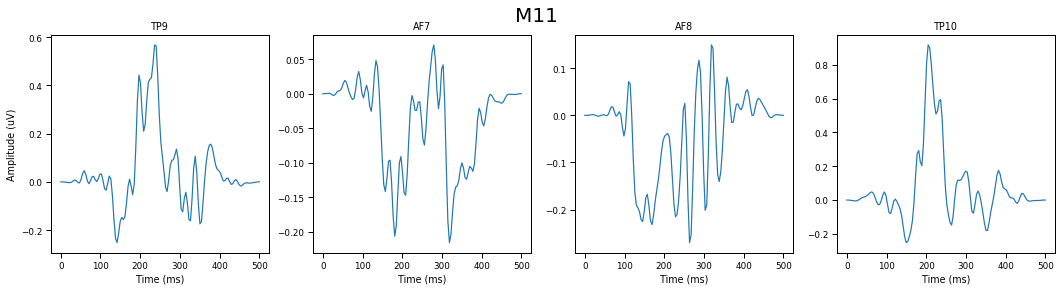

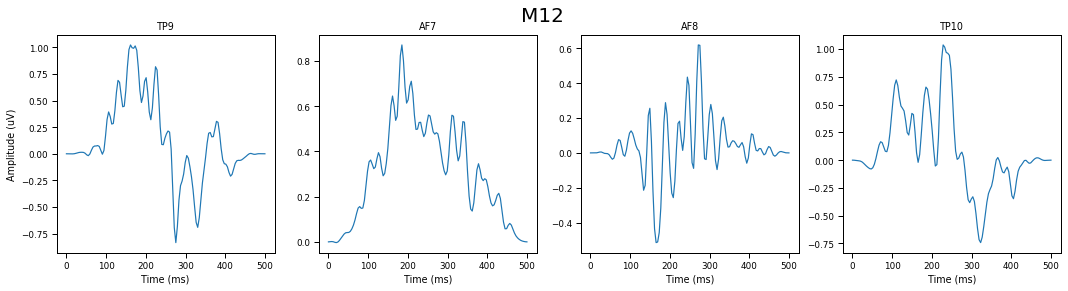

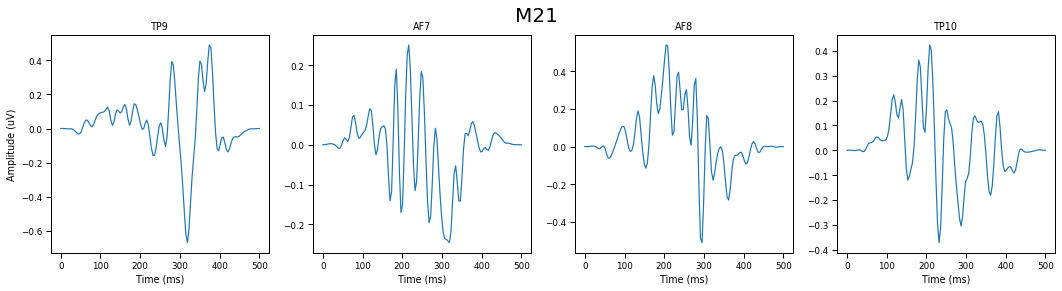

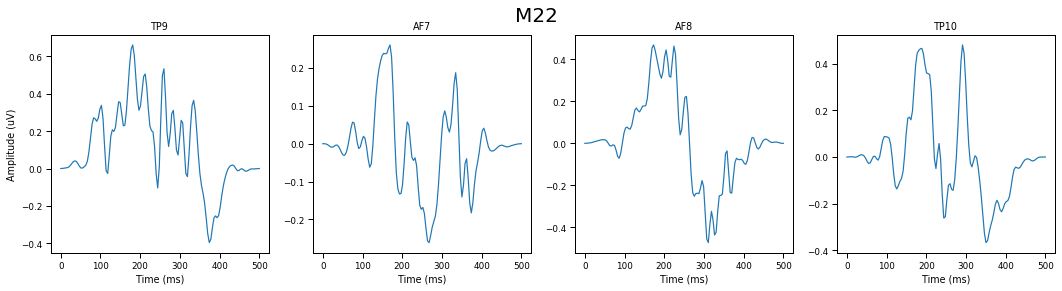

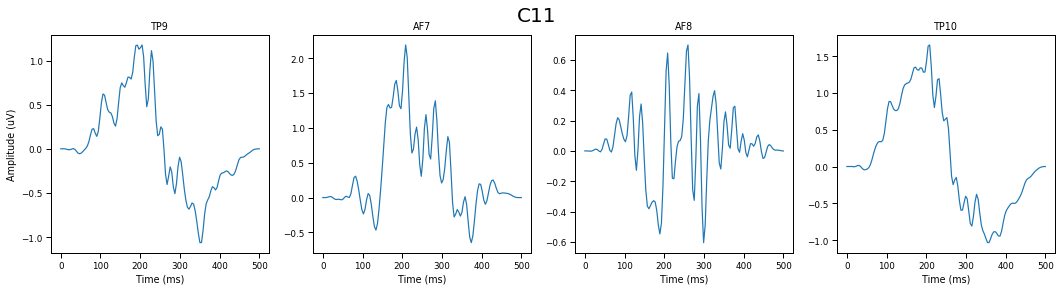

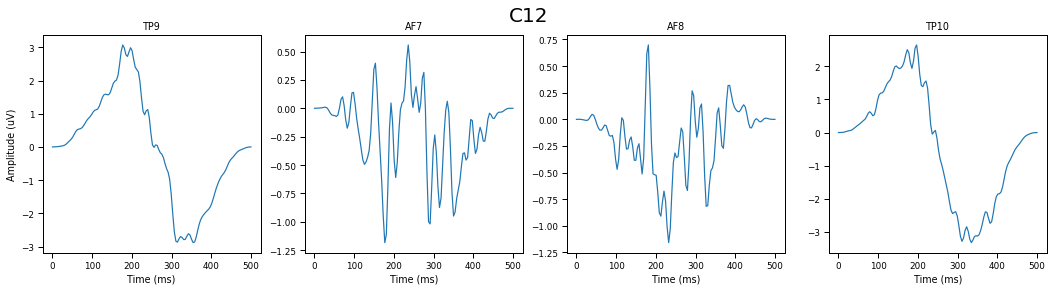

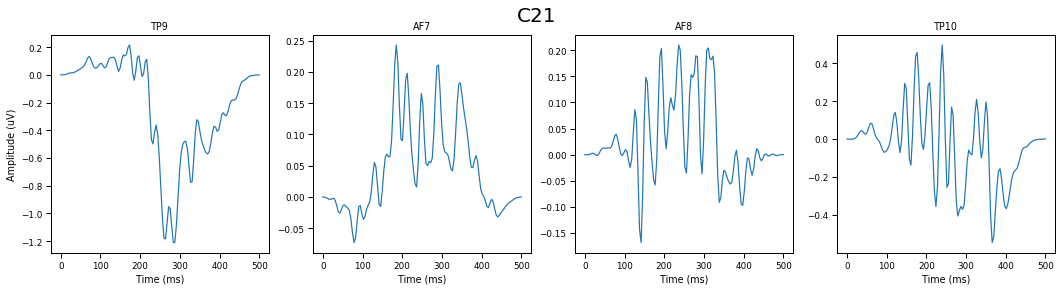

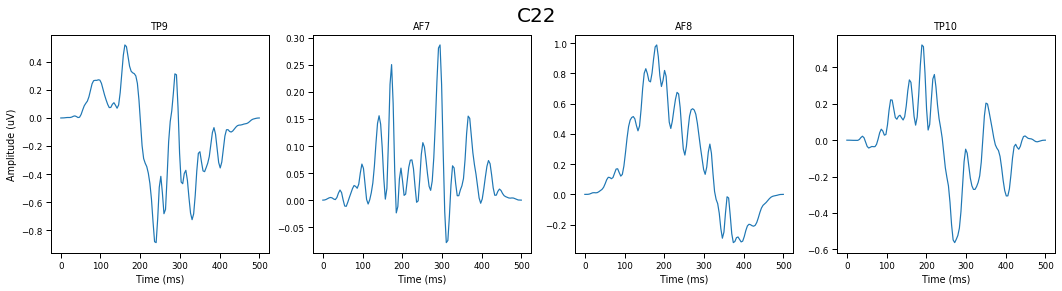

In [22]:
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_M11))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('M11', fontsize=20)
ax[0].plot(ts,tp_M11[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_M11[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_M11[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_M11[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)')
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_M12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('M12', fontsize=20)
ax[0].plot(ts,tp_M12[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_M12[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_M12[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_M12[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)')
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_M21))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('M21', fontsize=20)
ax[0].plot(ts,tp_M21[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_M21[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_M21[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_M21[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)')
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_M22))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('M22', fontsize=20)
ax[0].plot(ts,tp_M22[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_M22[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_M22[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_M22[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)')
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_C11))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('C11', fontsize=20)
ax[0].plot(ts,tp_C11[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_C11[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_C11[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_C11[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)') 
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_C12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('C12', fontsize=20)
ax[0].plot(ts,tp_C12[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_C12[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_C12[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_C12[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)')
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_C21))
fig.subplots_adjust(hspace=0.5) 
fig.suptitle('C21', fontsize=20)
ax[0].plot(ts,tp_C21[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_C21[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_C21[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_C21[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)')
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_C22))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('C22', fontsize=20)
ax[0].plot(ts,tp_C22[:,0])
ax[0].set_title('TP9')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,tp_C22[:,1])
ax[1].set_title('AF7')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,tp_C22[:,2])
ax[2].set_title('AF8')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,tp_C22[:,3])
ax[3].set_title('TP10')
ax[3].set_xlabel('Time (ms)')
plt.show()

## Visualization: Spectrogram Plots 1

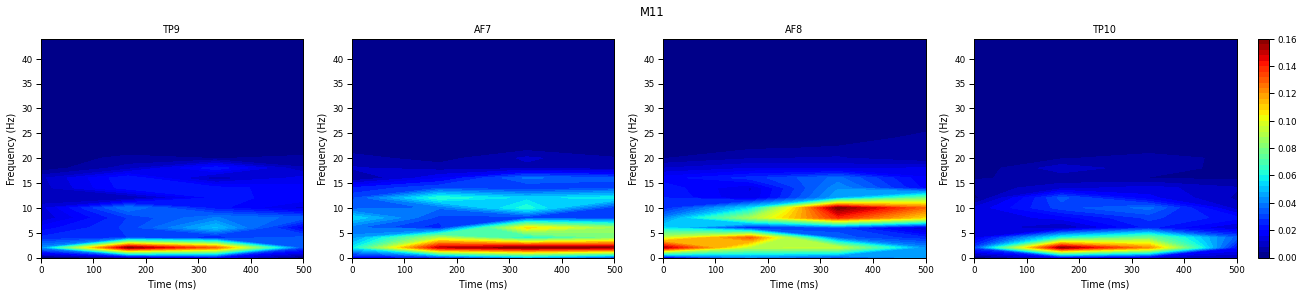

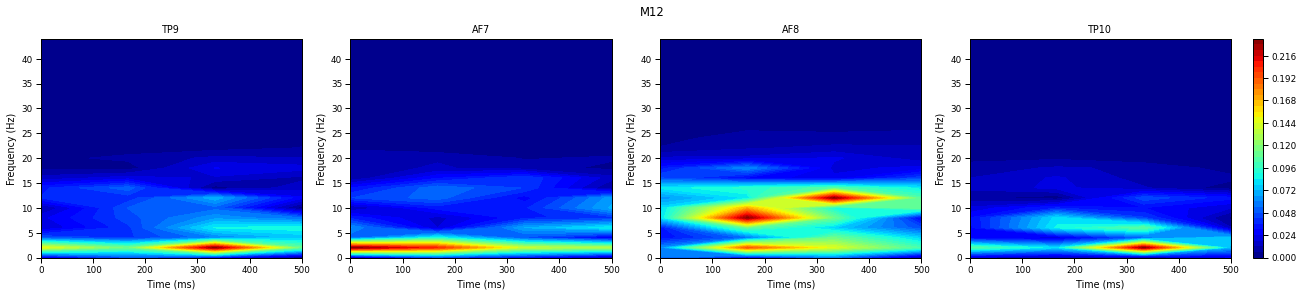

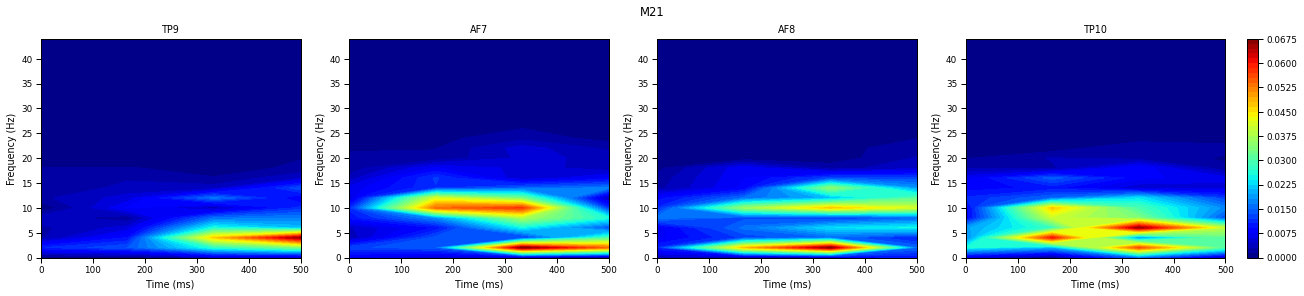

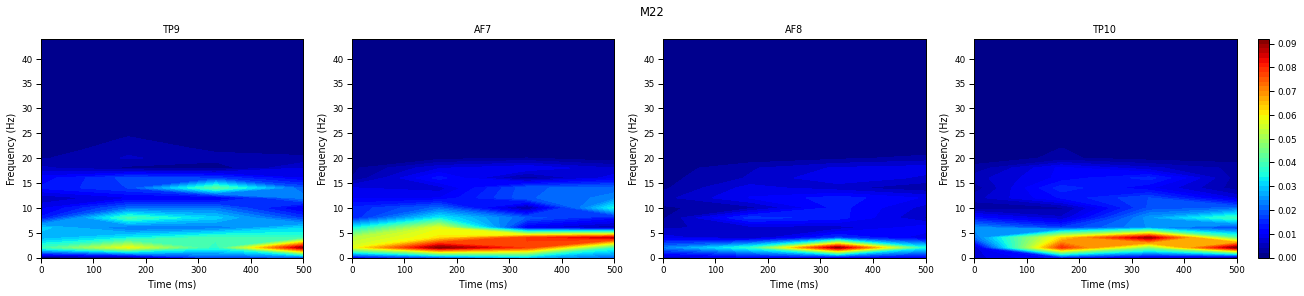

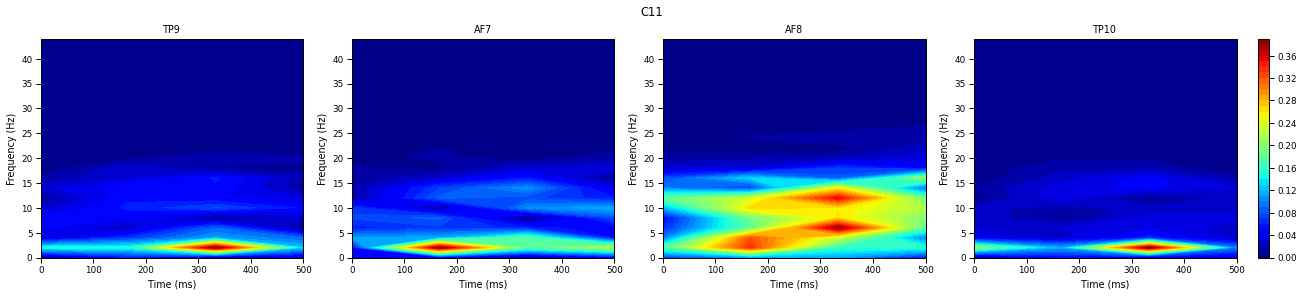

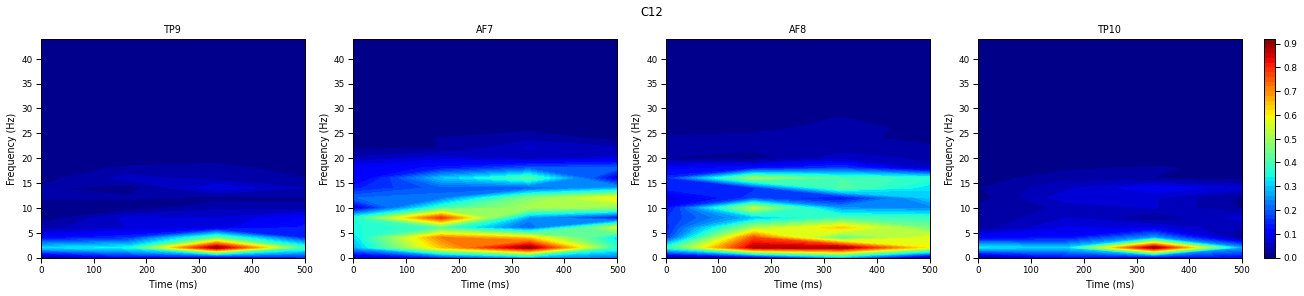

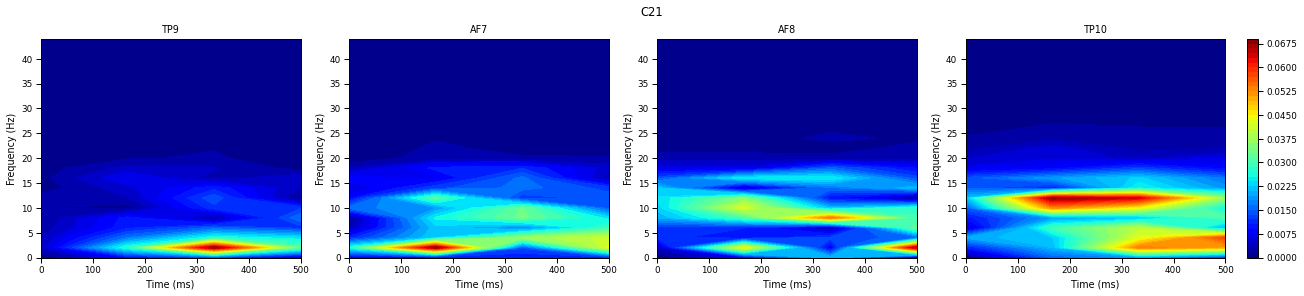

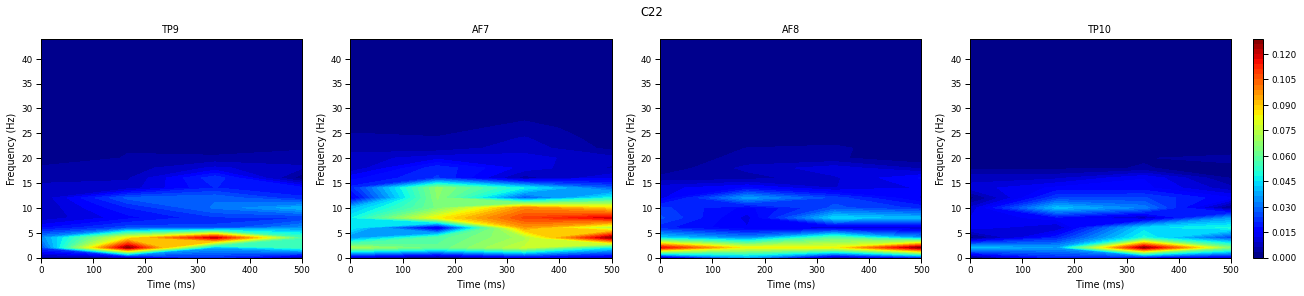

(array([  0.        , 166.66666667, 333.33333333, 500.        ]),
 array([  0.        , 166.66666667, 333.33333333, 500.        ]),
 array([  0.        , 166.66666667, 333.33333333, 500.        ]),
 array([  0.        , 166.66666667, 333.33333333, 500.        ]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44.]),
 array([[5.07903115e-03, 3.95310440e-03, 2.55545292e-02, 6.66048862e-03],
        [2.84053421e-02, 1.53935637e-01, 4.49513666e-02, 6.50167398e-02],
        [4.05613133e-02, 9.99769140e-02, 1.46253558e-01,

In [23]:
# plot spectrogram using power spectral density (PSD)
args = {'fs':88, 'figsize':(18,4), 'subtitles':['TP9','AF7','AF8','TP10']}
specM11,specM12,specM21,specM22 = np.nanmean(np.nanmean(arr_M11,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M12,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M21,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M22,axis=0),axis=2).T
specC11,specC12,specC21,specC22 = np.nanmean(np.nanmean(arr_C11,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C12,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C21,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C22,axis=0),axis=2).T

# formula for sampling frequency
spectrogram4D(specM11,'M11',**args)
spectrogram4D(specM12,'M12',**args)
spectrogram4D(specM21,'M21',**args)
spectrogram4D(specM22,'M22',**args)
spectrogram4D(specC11,'C11',**args)
spectrogram4D(specC12,'C12',**args)
spectrogram4D(specC21,'C21',**args)
spectrogram4D(specC22,'C22',**args)

## Visualization: Spectrogram Plots 2
<b> Collapse across channels

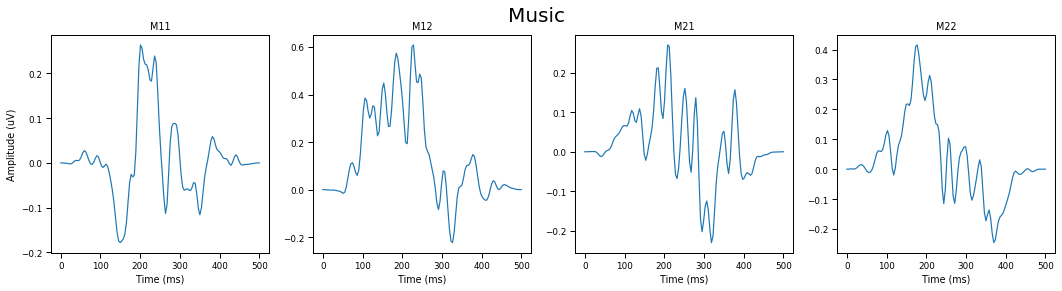

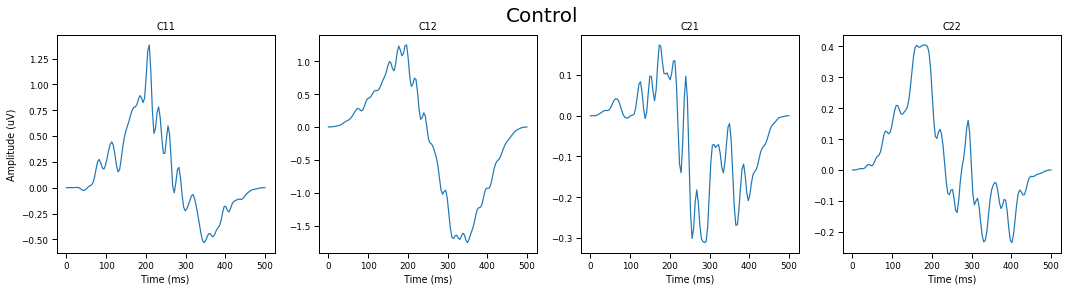

In [24]:
specM11,specM12,specM21,specM22 = np.nanmean(np.nanmean(arr_M11,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M12,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M21,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_M22,axis=0),axis=2).T
specC11,specC12,specC21,specC22 = np.nanmean(np.nanmean(arr_C11,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C12,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C21,axis=0),axis=2).T,np.nanmean(np.nanmean(arr_C22,axis=0),axis=2).T
spec_M11,spec_M12,spec_M21,spec_M22 = np.mean(specM11,axis=1),np.mean(specM12,axis=1),np.mean(specM21,axis=1),np.mean(specM22,axis=1)
spec_C11,spec_C12,spec_C21,spec_C22 = np.mean(specC11,axis=1),np.mean(specC12,axis=1),np.mean(specC21,axis=1),np.mean(specC22,axis=1)
spec_M = np.vstack((spec_M11,spec_M12,spec_M21,spec_M22)).T
spec_C = np.vstack((spec_C11,spec_C12,spec_C21,spec_C22)).T
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_M11))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Music', fontsize=20)
ax[0].plot(ts,spec_M[:,0])
ax[0].set_title('M11')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,spec_M[:,1])
ax[1].set_title('M12')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,spec_M[:,2])
ax[2].set_title('M21')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,spec_M[:,3])
ax[3].set_title('M22')
ax[3].set_xlabel('Time (ms)')
plt.show()
fig,ax = plt.subplots(1,4,figsize=(18,4))
ts = np.linspace(0,500,len(tp_C11)) 
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Control', fontsize=20)
ax[0].plot(ts,spec_C[:,0]) 
ax[0].set_title('C11')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlabel('Time (ms)')
ax[1].plot(ts,spec_C[:,1])
ax[1].set_title('C12')
ax[1].set_xlabel('Time (ms)')
ax[2].plot(ts,spec_C[:,2])
ax[2].set_title('C21')
ax[2].set_xlabel('Time (ms)')
ax[3].plot(ts,spec_C[:,3])
ax[3].set_title('C22')
ax[3].set_xlabel('Time (ms)')
plt.show()

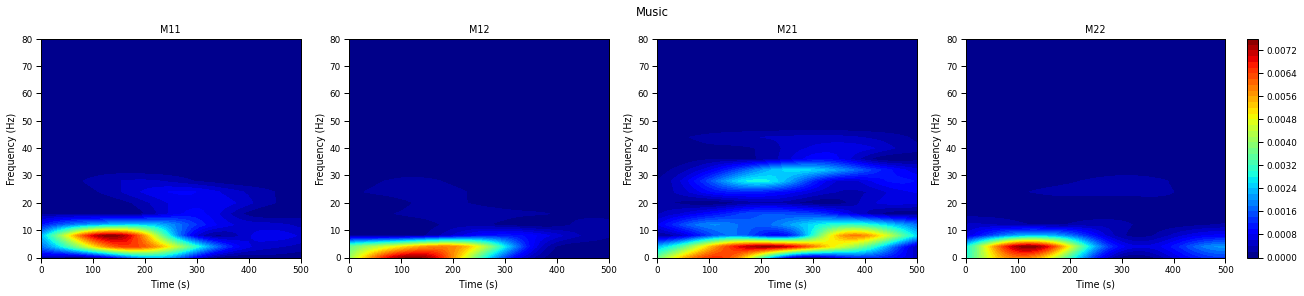

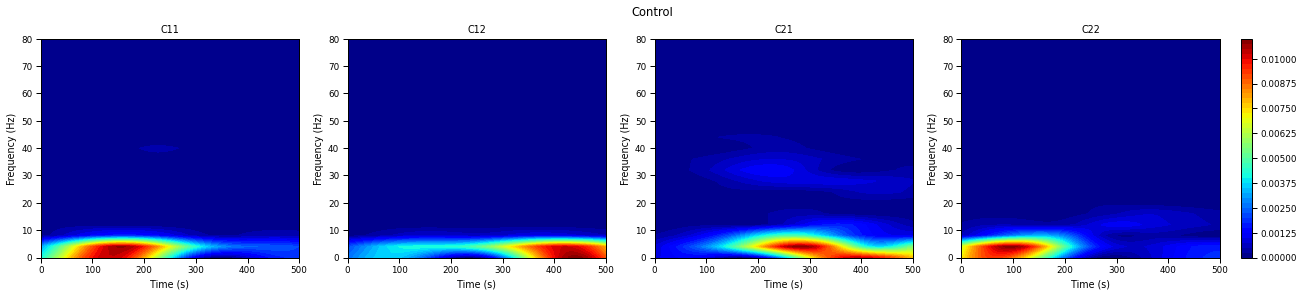

In [45]:


def stft_plots(data,fig_size,nfft,sfreq,noverlap,title,subtitles):
    fig, ax = plt.subplots(1,4, figsize=(fig_size[0],fig_size[1]), constrained_layout=True)
    d1,f1,t1,im1 = plt.specgram(data[:,0], NFFT= nfft, Fs=sfreq, noverlap=noverlap)
    d2,f2,t2,im2 = plt.specgram(data[:,1], NFFT= nfft, Fs=sfreq, noverlap=noverlap)
    d3,f3,t3,im3 = plt.specgram(data[:,2], NFFT= nfft, Fs=sfreq, noverlap=noverlap) 
    d4,f4,t4,im4 = plt.specgram(data[:,3], NFFT= nfft, Fs=sfreq, noverlap=noverlap)
    fig.suptitle(title)
    ax[0].set_title(subtitles[0])
    ax[1].set_title(subtitles[1])
    ax[2].set_title(subtitles[2])
    ax[3].set_title(subtitles[3])
    ax[0].set(xlabel='Time (s)',ylabel='Frequency (Hz)')
    ax[1].set(xlabel='Time (s)',ylabel='Frequency (Hz)')
    ax[2].set(xlabel='Time (s)',ylabel='Frequency (Hz)')
    ax[3].set(xlabel='Time (s)',ylabel='Frequency (Hz)')
    ax[0].set_ylim(0,80)
    ax[1].set_ylim(0,80)
    ax[2].set_ylim(0,80)
    ax[3].set_ylim(0,80)
    t1,t2,t3,t4= np.linspace(0,500,len(d1.T)),np.linspace(0,500,len(d2.T)),np.linspace(0,500,len(d3.T)),np.linspace(0,500,len(d4.T))
    level = 45
    spectrum = ax[0].contourf(t1,f1,d1,level, cmap='jet')
    spectrum = ax[1].contourf(t2,f2,d2,level, cmap='jet')
    spectrum = ax[2].contourf(t3,f3,d3,level, cmap='jet') 
    spectrum = ax[3].contourf(t4,f4,d4,level, cmap='jet')
    cbar = plt.colorbar(spectrum)
    plt.show()
    return d1,d2,d3,d4,f1,f2,f3,f4,t1,t2,t3,t4

NFFT, noverlap = 64,63
args_1 = {'fig_size':(18,4),'nfft':NFFT,'sfreq':256,'noverlap':noverlap,'title':'Music','subtitles':['M11','M12','M21','M22']}
args_2 = {'fig_size':(18,4),'nfft':NFFT,'sfreq':256,'noverlap':noverlap,'title':'Control','subtitles':['C11','C12','C21','C22']}
sM11,sM12,sM21,sM22,fM11,fM12,fM21,fM22,tM11,tM12,tM21,tM22 = stft_plots(spec_M,**args_1)
sC11,sC12,sC21,sC22,fC11,fC12,fC21,fC22,tC11,tC12,tC21,tC22 = stft_plots(spec_C,**args_2)


## Visualization: Spectrogram Plots 3
<b> Collapse based on hemisphere

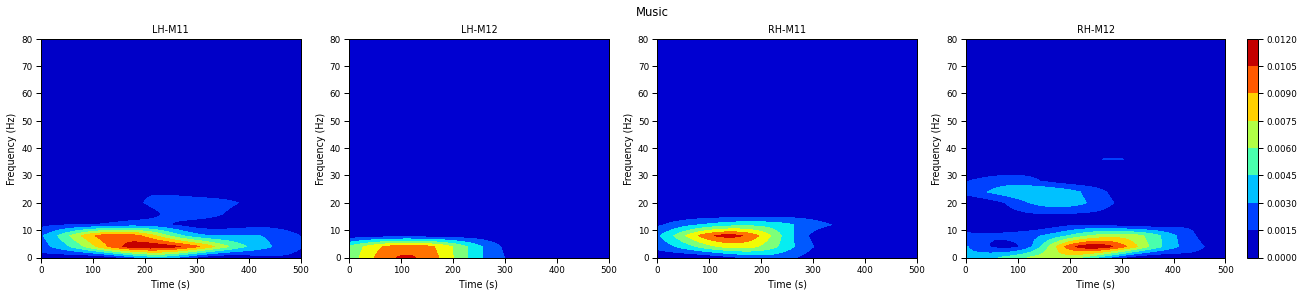

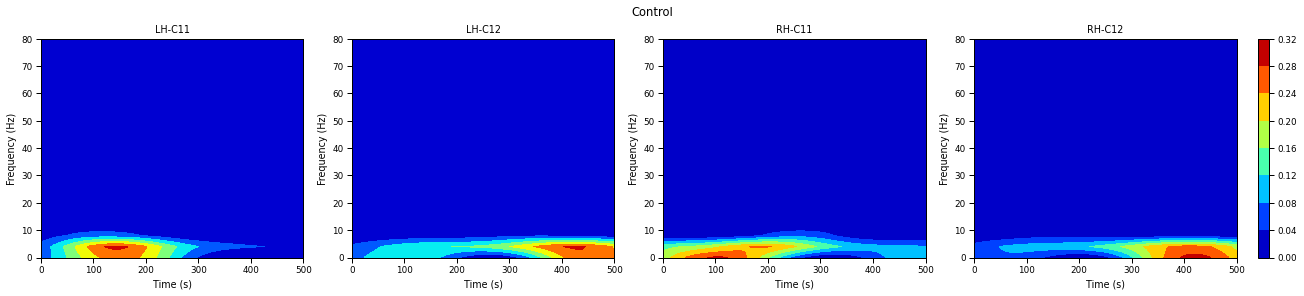

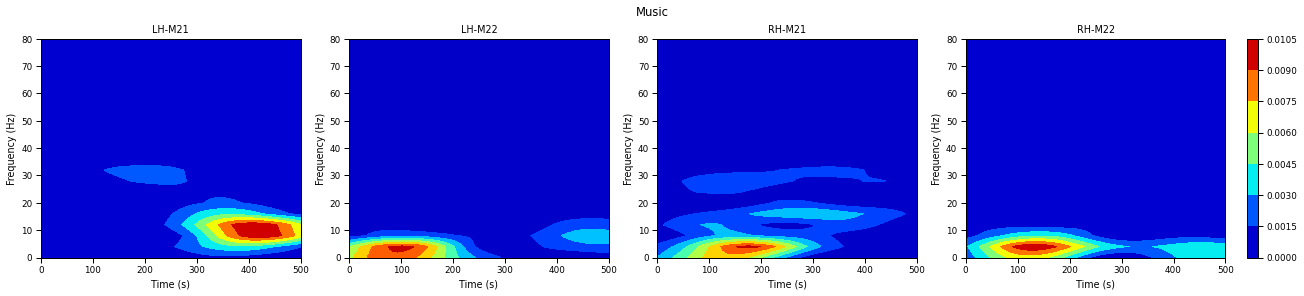

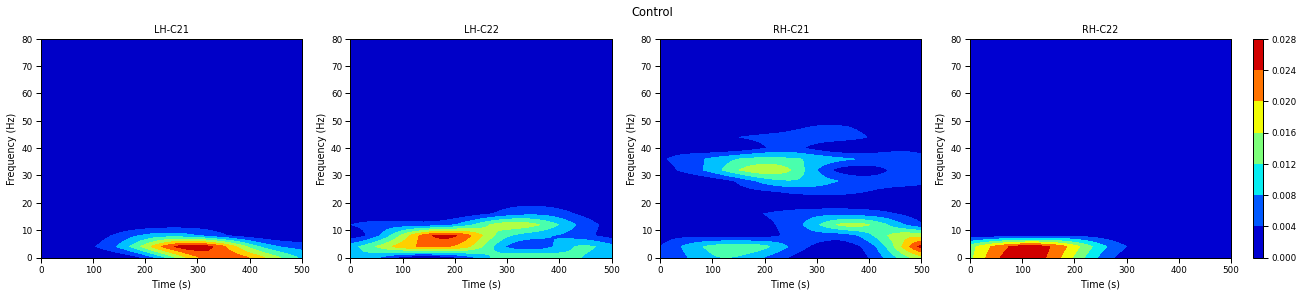

(array([[4.71838510e-04, 5.00888589e-04, 5.24774404e-04, ...,
         6.42221854e-03, 5.98827452e-03, 5.57851458e-03],
        [4.09874407e-04, 4.63680776e-04, 5.21650444e-04, ...,
         3.36026038e-03, 3.27920535e-03, 3.21583652e-03],
        [7.04029627e-05, 8.74745961e-05, 1.08700417e-04, ...,
         4.16703815e-05, 3.48002121e-05, 3.46313899e-05],
        ...,
        [3.25001982e-13, 9.07697780e-13, 1.24538420e-12, ...,
         4.30330952e-14, 3.22489692e-13, 9.12338305e-13],
        [2.88418974e-13, 7.85034329e-13, 9.26228194e-13, ...,
         3.23846977e-14, 2.86299206e-13, 7.88966899e-13],
        [1.38226217e-13, 3.72476425e-13, 4.11596456e-13, ...,
         1.44640285e-14, 1.37223972e-13, 3.74337984e-13]]),
 array([[2.22735385e-03, 2.22183099e-03, 2.18537359e-03, ...,
         2.00738087e-03, 1.92088014e-03, 1.82800674e-03],
        [2.06289738e-03, 2.22446549e-03, 2.39616472e-03, ...,
         2.16837051e-03, 2.02620761e-03, 1.87233341e-03],
        [2.12780428e-04, 

In [26]:
l_specM11,r_specM11,l_specM12,r_specM12 = np.mean(specM11[:,0:2],axis=1),np.mean(specM11[:,2:4],axis=1),np.mean(specM12[:,0:2],axis=1),np.mean(specM12[:,2:4],axis=1)
l_specM21,r_specM21,l_specM22,r_specM22 = np.mean(specM21[:,0:2],axis=1),np.mean(specM21[:,2:4],axis=1),np.mean(specM22[:,0:2],axis=1),np.mean(specM22[:,2:4],axis=1)
l_specC11,r_specC11,l_specC12,r_specC12 = np.mean(specC11[:,0:2],axis=1),np.mean(specC11[:,2:4],axis=1),np.mean(specC12[:,0:2],axis=1),np.mean(specC12[:,2:4],axis=1)
l_specC21,r_specC21,l_specC22,r_specC22 = np.mean(specC21[:,0:2],axis=1),np.mean(specC21[:,2:4],axis=1),np.mean(specC22[:,0:2],axis=1),np.mean(specC22[:,2:4],axis=1)
lr_specM1,lr_specM2 = np.vstack((l_specM11,l_specM12,r_specM11,r_specM12)).T,np.vstack((l_specM21,l_specM22,r_specM21,r_specM22)).T
lr_specC1,lr_specC2 = np.vstack((l_specC11,l_specC12,r_specC11,r_specC12)).T,np.vstack((l_specC21,l_specC22,r_specC21,r_specC22)).T

NFFT, noverlap = 64,63
args_m1 = {'fig_size':(18,4),'nfft':NFFT,'sfreq':256,'noverlap':noverlap,'title':'Music','subtitles':['LH-M11','LH-M12','RH-M11','RH-M12']}
args_m2 = {'fig_size':(18,4),'nfft':NFFT,'sfreq':256,'noverlap':noverlap,'title':'Music','subtitles':['LH-M21','LH-M22','RH-M21','RH-M22']}
args_c1 = {'fig_size':(18,4),'nfft':NFFT,'sfreq':256,'noverlap':noverlap,'title':'Control','subtitles':['LH-C11','LH-C12','RH-C11','RH-C12']}
args_c2 = {'fig_size':(18,4),'nfft':NFFT,'sfreq':256,'noverlap':noverlap,'title':'Control','subtitles':['LH-C21','LH-C22','RH-C21','RH-C22']}

stft_plots(lr_specM1,**args_m1)
stft_plots(lr_specC1,**args_c1)
stft_plots(lr_specM2,**args_m2) 
stft_plots(lr_specC2,**args_c2)

## Statistical Analysis: Paired T-test